In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import numpy
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import cv2
from PIL import Image
import seaborn as sns

In [2]:
#the running of this seperate file needs the revision of relative path
train_label_path = './Datasets/cartoon_set/train_new.csv'
train_img_path = './Datasets/cartoon_set/img/'
test_label_path = './Datasets/cartoon_set_test/test_new.csv'
test_img_path = './Datasets/cartoon_set_test/img/'

#define the image data preprocessing including resize and conversion to L
def loadImage(path):
    img = Image.open(path)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    median = cv2.resize(img, (64, 64))
    img_resize = Image.fromarray(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))
    img = img_resize.convert("L")
    data = img.getdata()
    return data

#load training dataset
dataset = pd.read_csv(train_label_path)  # read csv file
y_train = dataset['eye_color']
img_name1 = dataset['file_name']

x_train = []
for name in img_name1:
    img_path = train_img_path + name
    img = loadImage(img_path)
    x_train.append(img) 

# Load test data
data_test = pd.read_csv(test_label_path)  # read csv file
y_test = data_test['eye_color']
img_name2 = data_test['file_name']

x_test = []
for name in img_name2:
    img_path = test_img_path + name  # get path
    img = loadImage(img_path)
    x_test.append(img)  # add pic

#data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("Dataset prepared")

8390 4096


In [3]:
# GridSearchCV
'''
param_grid = {'criterion': ['entropy'],
              'max_depth': [5, 10, 15, 35],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 5, 10]}
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,cv=10)
grid.fit(x_train,y_train)
print('Best Parameter:',grid.best_params_,'Best Score:', grid.best_score_) 
'''

"\nparam_grid = {'criterion': ['entropy'],\n              'max_depth': [5, 10, 15, 35],\n              'min_samples_split': [2, 3, 4, 5],\n              'min_samples_leaf': [1, 5, 10]}\ngrid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,cv=10)\ngrid.fit(x_train,y_train)\nprint('Best Parameter:',grid.best_params_,'Best Score:', grid.best_score_) \n"

In [4]:
#Importing the Decision tree classifier from the sklearn library.
#define parameters of decision tree classifier
tree_params={
    'criterion':'entropy',
    'max_depth': 15, 
    'min_samples_leaf': 1,
    'min_samples_split':4
}
clf = tree.DecisionTreeClassifier( **tree_params )

# Cross-validation
'''
for q in range(0,10,1):
    test_size=[0.8,0.6,0.4,0.2,0.05]
    size=test_size[q]
    print("test_size = ",size)
    for p in range(3):
        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)
        clf.fit(x_train_split,y_train_split)
        y_pred = clf.predict(x_val)
        y_pred_training = clf.predict(x_train_split)
        print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))
        print('Accuracy Score on test data: ', accuracy_score(y_true=y_val, y_pred=y_pred))
'''

'\nfor q in range(0,10,1):\n    test_size=[0.8,0.6,0.4,0.2,0.05]\n    size=test_size[q]\n    print("test_size = ",size)\n    for p in range(3):\n        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)\n        clf.fit(x_train_split,y_train_split)\n        y_pred = clf.predict(x_val)\n        y_pred_training = clf.predict(x_train_split)\n        print(\'Accuracy Score on train data: \', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))\n        print(\'Accuracy Score on test data: \', accuracy_score(y_true=y_val, y_pred=y_pred))\n'

In [5]:
#Training the decision tree classifier on training set.
clf.fit(x_train,y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(x_test)

#Use accuracy metric from sklearn.metrics library
#print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test,y_pred))#text report showing the main classification metrics

Accuracy Score on test data:  0.9685863874345549
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       419
           1       0.98      0.97      0.97       406
           2       0.96      0.97      0.97       448
           3       0.96      0.97      0.97       426
           4       0.97      0.97      0.97       402

    accuracy                           0.97      2101
   macro avg       0.97      0.97      0.97      2101
weighted avg       0.97      0.97      0.97      2101



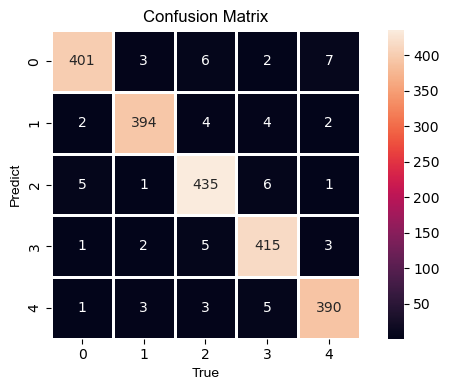

In [6]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(df_cm, 
                annot=True, 
                fmt=".20g", 
                linewidths=2, 
                square=True
                )

ax.set_xlabel('True', family='Arial')
ax.set_ylabel('Predict', family='Arial')
ax.set_title('Confusion Matrix', family='Arial')
plt.tight_layout()
plt.savefig('B2_DT.png', dpi=300)